In [50]:
import os
import re
import numpy
from pprint import pprint
import pandas
import matplotlib.pyplot as plt

pandas.set_option("display.max_colwidth", 50) # this is my comment

load data:

In [51]:
dispatchFile = "textList.csv"
dispatch = pandas.read_csv(dispatchFile, sep="\t", header=0)

In [52]:
dispatch.head(10)

,itemID,date,text
0,1864-04-28_article_001,1864-04-28,the news.;;; yesterday was an unusual dull day...
1,1864-04-28_article_002,1864-04-28,yankee rule in plymouth.;;; the following orde...
2,1864-04-28_article_003,1864-04-28,list of members of the next house of represent...
3,1864-04-28_article_004,1864-04-28,provisions at the south.;;; --the mobile adver...
4,1864-04-28_article_005,1864-04-28,impressive ceremony at dalton.;;; --a most int...
5,1864-04-28_article_006,1864-04-28,a sure way to avoid service.;;; --the winston ...
6,1864-04-28_article_007,1864-04-28,"new york papers, of friday last, have been rec..."
7,1864-04-28_article_008,1864-04-28,the peace democracy.;;; --a letter from a sout...
8,1864-04-28_article_009,1864-04-28,the iron-clad albemarle at plymouth.;;; --a ge...
9,1864-04-28_article_010,1864-04-28,changed its destination.;;; --the charlotte (n...


In [53]:
dispatch["month"] = [re.sub("-\d\d$", "-01", str(i)) for i in dispatch["date"]]
# convert into date format
dispatch["month"] = pandas.to_datetime(dispatch["month"], format="%Y-%m-%d")
dispatch["date"] = pandas.to_datetime(dispatch["date"], format="%Y-%m-%d")

# reorder columns
dispatch = dispatch[["month", "text"]]

In [54]:
dispatch.head(10)

,month,text
0,1864-04-01,the news.;;; yesterday was an unusual dull day...
1,1864-04-01,yankee rule in plymouth.;;; the following orde...
2,1864-04-01,list of members of the next house of represent...
3,1864-04-01,provisions at the south.;;; --the mobile adver...
4,1864-04-01,impressive ceremony at dalton.;;; --a most int...
5,1864-04-01,a sure way to avoid service.;;; --the winston ...
6,1864-04-01,"new york papers, of friday last, have been rec..."
7,1864-04-01,the peace democracy.;;; --a letter from a sout...
8,1864-04-01,the iron-clad albemarle at plymouth.;;; --a ge...
9,1864-04-01,changed its destination.;;; --the charlotte (n...


In [137]:
var = "death"

dispatch_search = dispatch[dispatch["text"].str.contains(var)]
dispatch_search = dispatch_search.reset_index()
dispatch_search['occur'] = dispatch_search["text"].str.count(var)
dispatch_search = dispatch_search[["month", "occur"]]

aggregation = {"occur":"sum"}
dispatch_search = dispatch_search.groupby(dispatch_search['month']).aggregate(aggregation)
dispatch_search = dispatch_search.reset_index()

In [138]:
dispatch_search

,month,occur
0,1860-11-01,209
1,1860-12-01,214
2,1861-01-01,185
3,1861-02-01,157
4,1861-03-01,159
5,1861-04-01,144
6,1861-05-01,195
7,1861-06-01,218
8,1861-07-01,321
9,1861-08-01,288


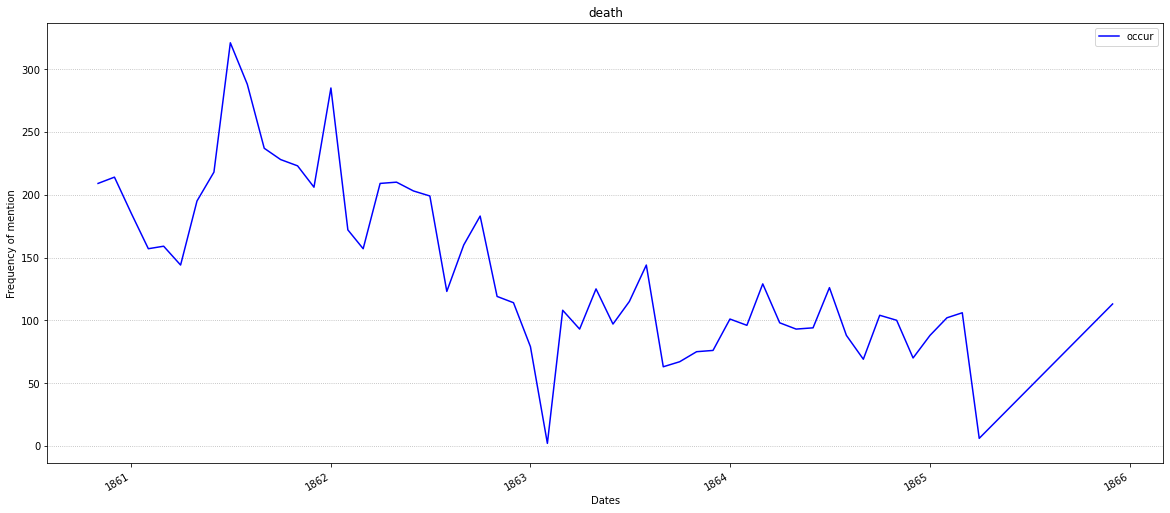

In [139]:
dispatch_search.plot(
    x='month',
    legend=True, 
    color='blue'
)

plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel("Frequency of mention")
plt.xlabel("Dates")
plt.title(var)
plt.gca().yaxis.grid(linestyle=':')